In [1]:
# importing packages and defining some useful 

import nltk
import pandas as pd
import docx2txt
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem import WordNetLemmatizer

# to display everyting, no truncating

pd.set_option('display.max_colwidth', None)

# set stop words = english

stop_words=stopwords.words('english')

# Get data

In [2]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.txt')

In [3]:
# lower headers

data.columns=data.columns.str.lower()

In [4]:
# dropping unnecesary column

data.drop(['unnamed: 0'], axis=1, inplace=True)

# investigate data

In [5]:
data.columns

Index(['clothing id', 'age', 'title', 'review text', 'rating',
       'recommended ind', 'positive feedback count', 'division name',
       'department name', 'class name'],
      dtype='object')

In [6]:
data.shape

(23486, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review text              22641 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended ind          23486 non-null  int64 
 6   positive feedback count  23486 non-null  int64 
 7   division name            23472 non-null  object
 8   department name          23472 non-null  object
 9   class name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


# Drop nulls in selected columns

In [8]:
data.dropna(subset=['review text', 'department name'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              22628 non-null  int64 
 1   age                      22628 non-null  int64 
 2   title                    19662 non-null  object
 3   review text              22628 non-null  object
 4   rating                   22628 non-null  int64 
 5   recommended ind          22628 non-null  int64 
 6   positive feedback count  22628 non-null  int64 
 7   division name            22628 non-null  object
 8   department name          22628 non-null  object
 9   class name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


# Cleaning review text

In [10]:
# this is Sian's function ;P

def cleaning(data):
    text_tokens = word_tokenize(data.replace("'", "").lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

In [11]:
# applying the function to get a new column

counter = 0
data['tokenized']=None
for cell in data['review text']:
    data['tokenized'][counter]=cleaning(cell)
    counter += 1

C:\Users\x\AppData\Local\Temp/ipykernel_27840/2330650537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized'][counter]=cleaning(cell)


# checking numerical info and making some simple graphs

In [12]:
data.describe()

,clothing id,age,rating,recommended ind,positive feedback count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784
std,201.683804,12.328176,1.115911,0.385222,5.787520
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


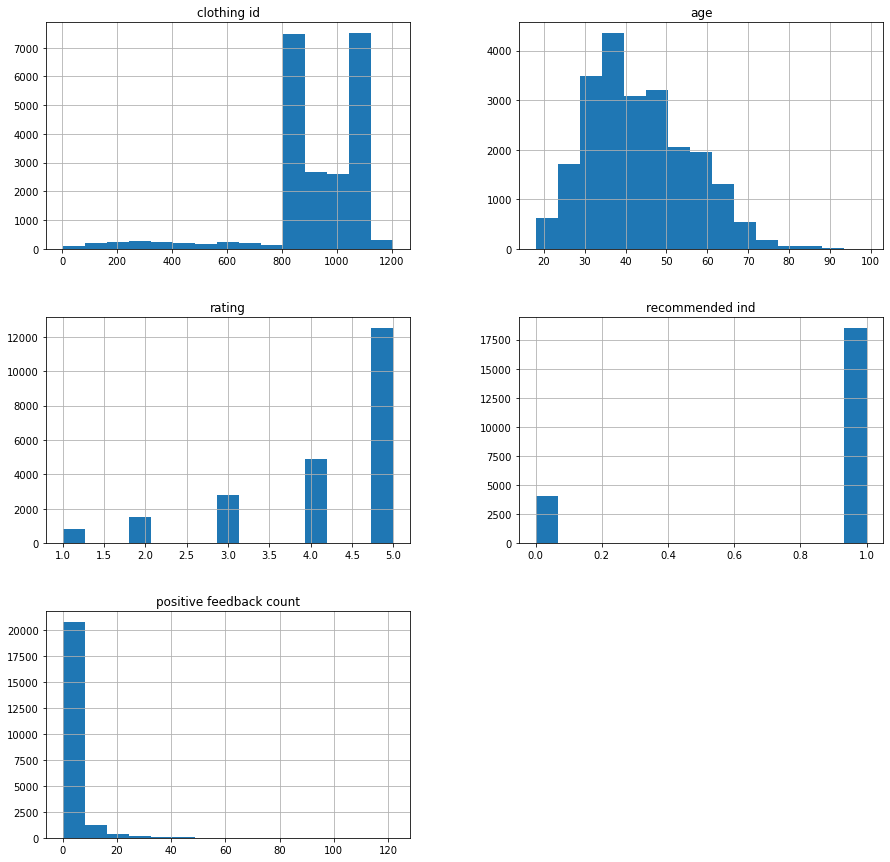

In [13]:
data.hist(bins=15,figsize=(15,15));

<AxesSubplot:ylabel='recommended ind'>

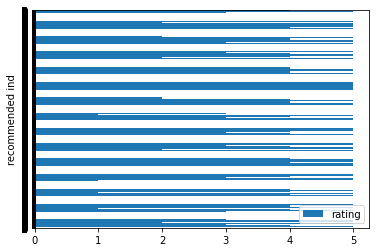

In [14]:
data.plot.barh(x='recommended ind', y='rating')

# First group by (rating)

In [15]:
subdata=data[['rating', 'division name', 'department name']].copy()

In [16]:
subdata.head()

,rating,division name,department name
0,4,Initmates,Intimate
1,5,General,Dresses
2,3,General,Dresses
3,5,General Petite,Bottoms
4,5,General,Tops


In [17]:
grouped_df = subdata.groupby(["division name", "department name"]).mean()

In [18]:
grouped_df.head(30)

rating
division name  department name          
General        Bottoms          4.260727
               Dresses          4.150318
               Jackets          4.225962
               Tops             4.136778
               Trend            3.852632
General Petite Bottoms          4.315226
               Dresses          4.122328
               Intimate         4.242291
               Jackets          4.301587
               Tops             4.197520
               Trend            3.782609
Initmates      Intimate         4.275596

<AxesSubplot:xlabel='division name,department name'>

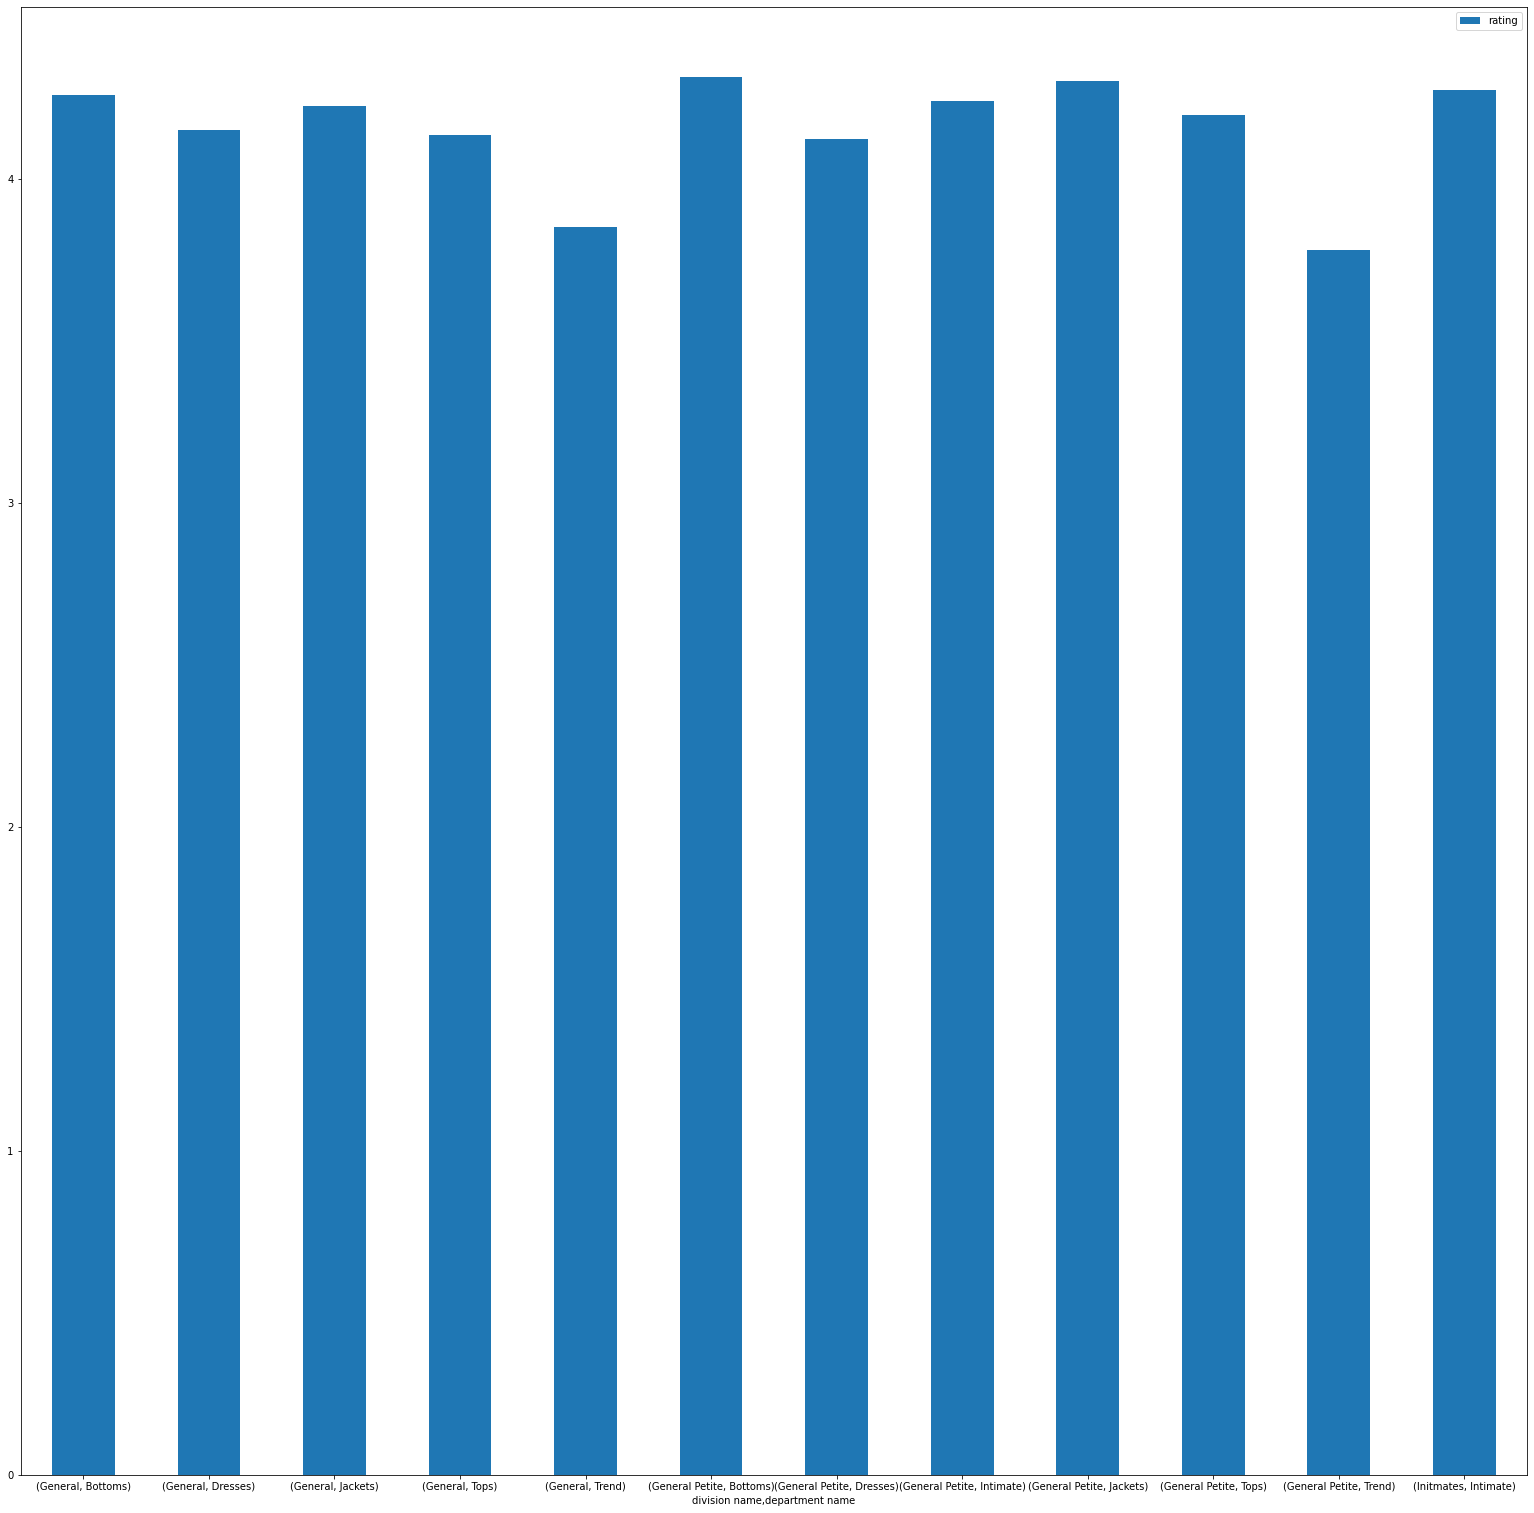

In [19]:
grouped_df.plot.bar(rot=0, figsize=(27,27))

# Check polarity in selected cells

In [20]:
lst = [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
for i in lst:
    print('cell number ' + str(i) + ':')
    print()
    print(data['tokenized'][i])
    print()
    print(TextBlob(data['tokenized'][i]).polarity)
    if TextBlob(data['tokenized'][i]).polarity < 0.333:
        print('low polarity')
    elif TextBlob(data['tokenized'][i]).polarity > 0.666:
        print('high polarity')
    else:
        print('medium polarity')
    print()
    print()
    print()


cell number 1:

love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite

0.31875000000000003
low polarity



cell number 2:

high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c

0.0624092970521542
low polarity



cell number 3:

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment

0.5
medium polarity



cell number 5:

love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress

0.15
low

# Separate sentences

In [21]:
lst = [5, 50, 65, 105]
for i in lst:
    counter = 0
    for sentence in (nltk.sent_tokenize(data['review text'][i])):
        counter += 1
        print ('Cell ' + str(i) + ' - sentence number '+ str(counter) + ': ' + str(sentence))
    print()

Cell 5 - sentence number 1: I love tracy reese dresses, but this one is not for the very petite.
Cell 5 - sentence number 2: i am just under 5 feet tall and usually wear a 0p in this brand.
Cell 5 - sentence number 3: this dress was very pretty out of the package but its a lot of dress.
Cell 5 - sentence number 4: the skirt is long and very full so it overwhelmed my small frame.
Cell 5 - sentence number 5: not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment.
Cell 5 - sentence number 6: i love the color and the idea of the style but it just did not work on me.
Cell 5 - sentence number 7: i returned this dress.

Cell 50 - sentence number 1: This is a cute top that can transition easily from summer to fall.
Cell 50 - sentence number 2: it fits well, nice print and it's comfortable.
Cell 50 - sentence number 3: i tried this on in the store, but did not purchase it because the color washed me out.
Cell 50 - sentence number 

# Create polarity column

In [22]:
data=data.dropna(subset=['rating'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              22628 non-null  int64 
 1   age                      22628 non-null  int64 
 2   title                    19662 non-null  object
 3   review text              22628 non-null  object
 4   rating                   22628 non-null  int64 
 5   recommended ind          22628 non-null  int64 
 6   positive feedback count  22628 non-null  int64 
 7   division name            22628 non-null  object
 8   department name          22628 non-null  object
 9   class name               22628 non-null  object
 10  tokenized                21798 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.1+ MB


In [24]:
data['polarity']= None
counter=0
for cell in data['review text']:
    data['polarity'][counter]=TextBlob(cell).polarity
    counter+=1

C:\Users\x\AppData\Local\Temp/ipykernel_27840/523480082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'][counter]=TextBlob(cell).polarity


# Second group by (minimum polarity)

In [25]:
subdata2=data[['polarity', 'division name', 'department name']].copy()

In [26]:
subdata2.head()

,polarity,division name,department name
0,0.633333,Initmates,Intimate
1,0.339583,General,Dresses
2,0.073675,General,Dresses
3,0.55,General Petite,Bottoms
4,0.512891,General,Tops


In [27]:
grouped_df2 = subdata2.groupby(["division name", "department name"]).min()

In [28]:
grouped_df2.head(30)

polarity
division name  department name          
General        Bottoms         -0.800000
               Dresses         -0.500000
               Jackets         -0.409524
               Tops            -0.575000
               Trend           -0.212500
General Petite Bottoms         -0.500000
               Dresses         -0.975000
               Intimate        -0.250000
               Jackets         -0.975000
               Tops            -0.750000
               Trend           -0.057407
Initmates      Intimate        -0.375000

<AxesSubplot:xlabel='division name,department name'>

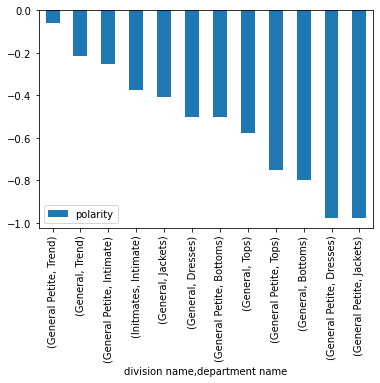

In [29]:
grouped_df2[['polarity']].sort_values(by='polarity',ascending=False).plot(kind='bar')

# Third group by (mean polarity)

In [30]:
grouped_df3 = subdata2.groupby(["division name", "department name"]).mean()

In [31]:
grouped_df3.head(30)

polarity
division name  department name          
General        Bottoms          0.250396
               Dresses          0.253652
               Jackets          0.245392
               Tops             0.248483
               Trend            0.235739
General Petite Bottoms          0.254209
               Dresses          0.250058
               Intimate         0.248243
               Jackets          0.240644
               Tops             0.250122
               Trend            0.247564
Initmates      Intimate         0.248210

<AxesSubplot:xlabel='division name,department name'>

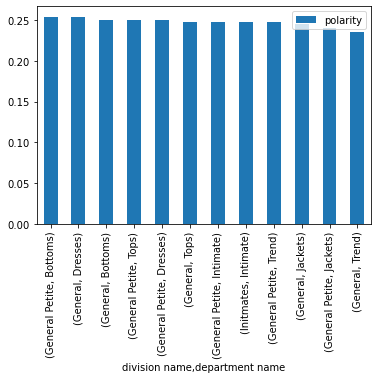

In [32]:
grouped_df3[['polarity']].sort_values(by='polarity',ascending=False).plot(kind='bar')